In [1]:
from tqdm import tqdm 

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

from torch.distributions import Uniform, Distribution

from utils import NICE

In [2]:
torch.manual_seed(42)
torch.set_default_dtype(torch.float32)

In [3]:
input_dim = 28*28  # input size (MNIST)
hidden_dim = 1000  # output size of the hidden layers
num_coupling_layers = 5  # number of coupling layers
num_layers = 6  # number of linear layers for each coupling layer

In [4]:
def test_model(model):
    xhat = model.sample(8)

    fig, ax = plt.subplots(nrows=2, ncols=4)
    i = 0
    for row in ax:
        for col in row:
            col.imshow(xhat[i].cpu().detach().numpy().reshape(28, 28), cmap='binary')
            col.axis('off')
            i += 1
    plt.draw()

## NotSoNICE (Gaussian prior + No scaling)

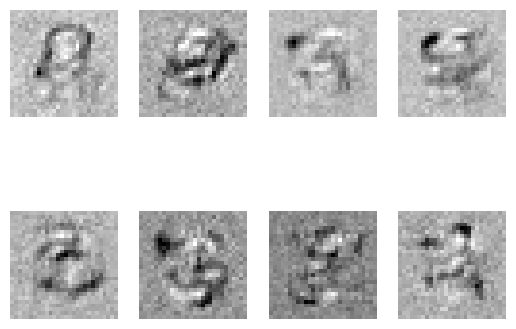

In [5]:
# Define the NotSoNICE model
model = NICE(input_dim=input_dim, num_coupling_layers=num_coupling_layers, num_layers=num_layers, 
             use_scaling=False, prior_type='normal')

loaded_state_dict = torch.load("saved_models/NotSoNICE.pt", map_location=torch.device('cpu'))  # when you train with CUDA but evaluate on CPU
model.load_state_dict(loaded_state_dict)

# Set the model to eval mode
model.eval()

test_model(model)

## AlmostNICE (Gaussian prior + Scaling)

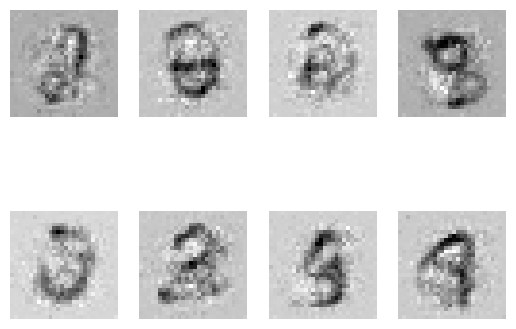

In [6]:
# Define the AlmostNICE model
model = NICE(input_dim=input_dim, num_coupling_layers=num_coupling_layers, num_layers=num_layers, 
             use_scaling=True, prior_type='normal')

loaded_state_dict = torch.load("saved_models/AlmostNICE.pt", map_location=torch.device('cpu'))  # when you train with CUDA but evaluate on CPU
model.load_state_dict(loaded_state_dict)

# Set the model to eval mode
model.eval()

test_model(model)

## NICE-OG (Logistic prior + Scaling)

/home/marchiorot/anaconda3/envs/hy673/lib/python3.10/site-packages/torch/distributions/distribution.py:45: UserWarning: <class 'utils.LogisticDistribution'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


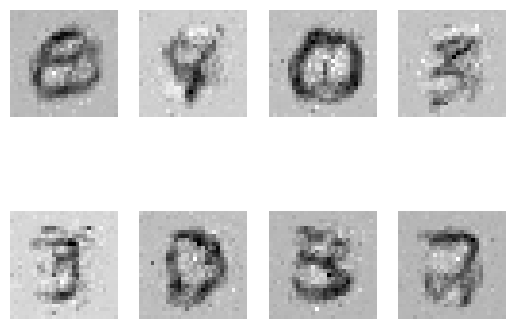

In [7]:
# Define the NICE model
model = NICE(input_dim=input_dim, num_coupling_layers=num_coupling_layers, num_layers=num_layers, 
             use_scaling=True, prior_type='logistic')

loaded_state_dict = torch.load("saved_models/NICE.pt", map_location=torch.device('cpu'))  # when you train with CUDA but evaluate on CPU
model.load_state_dict(loaded_state_dict)

# Set the model to eval mode
model.eval()

test_model(model)

## Invertibility

In [8]:
# Define the dataset and data loader
train_dataset = MNIST(root='./data', train=True, transform=ToTensor())

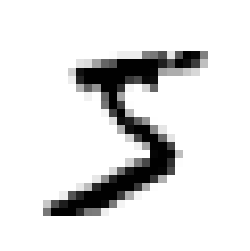

In [22]:
x, _ = train_dataset[0]

plt.figure(figsize=(3,3))
plt.imshow(x[0], cmap='binary')
plt.axis('off')
plt.draw()

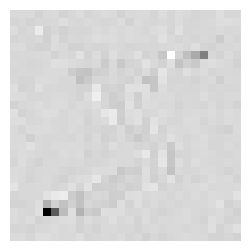

In [23]:
z, _ = model(x.reshape(1, 28*28))

plt.figure(figsize=(3,3))
plt.imshow(z.detach().reshape(28, 28), cmap='binary')
plt.axis('off')
plt.draw()

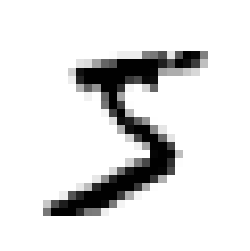

In [24]:
xhat = model.inverse(z)

plt.figure(figsize=(3,3))
plt.imshow(xhat.detach().reshape(28, 28), cmap='binary')
plt.axis('off')
plt.draw()